# Ансамблевые методы

Основная цель - объединить несколько переобученных моделей. Это баггинг

Ансамбль случайных деревьев - случайный лес

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

iris = sns.load_dataset('iris')

In [42]:
species_int = []
for r in iris.values:
    match r[4]:
        case 'setosa':
            species_int.append(1)
        case 'versicolor':
            species_int.append(2)
        case 'virginica':
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
data = iris[['sepal_length', 'petal_length']]
data['species'] = species_int_df

data_df_setosa = data[data['species'] == 1]
data_df_versicolor = data[data['species'] == 2]
data_df_virginica = data[data['species'] == 3]

data_df_versicolor_A = data_df_versicolor.iloc[:25, :]
data_df_versicolor_B = data_df_versicolor.iloc[25:, :]

data_df_virginica_A = data_df_virginica.iloc[:25, :]
data_df_virginica_B = data_df_virginica.iloc[25:, :]

data_df_A = pd.concat([data_df_virginica_A, data_df_versicolor_A], ignore_index=True)
data_df_B = pd.concat([data_df_virginica_B, data_df_versicolor_B], ignore_index=True)

x1_p = np.linspace(min(data['sepal_length'])-0.5, max(data['sepal_length'])+0.5, 100)
x2_p = np.linspace(min(data['petal_length'])-0.5, max(data['petal_length'])+0.5, 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length'])

C:\Users\huawei\AppData\Local\Temp\ipykernel_8392\2278731672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = species_int_df


C:\Users\huawei\AppData\Local\Temp\ipykernel_8392\2453704335.py:9: UserWarning: The following kwargs were not used by contour: 'level'
  ax[0].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=3, cmap='rainbow', zorder=1)
C:\Users\huawei\AppData\Local\Temp\ipykernel_8392\2453704335.py:19: UserWarning: The following kwargs were not used by contour: 'level'
  ax[1].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=3, cmap='rainbow', zorder=1)
C:\Users\huawei\AppData\Local\Temp\ipykernel_8392\2453704335.py:28: UserWarning: The following kwargs were not used by contour: 'level'
  ax[2].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=3, cmap='rainbow', zorder=1)


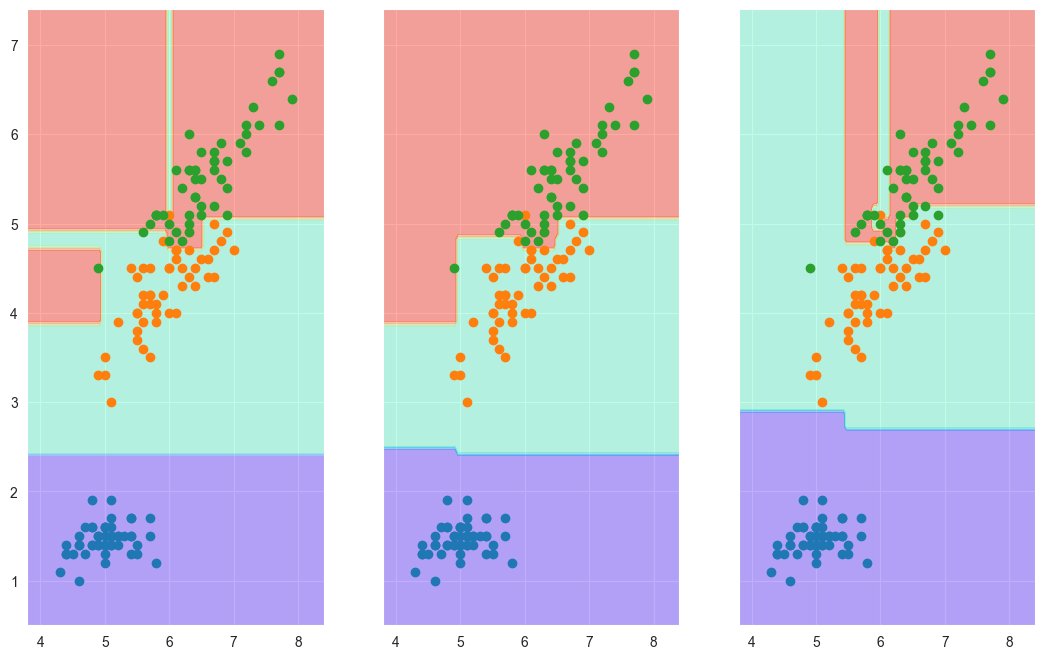

In [44]:
fig, ax = plt.subplots(1,3, sharex='col', sharey='row', figsize=(13, 8))
X = data[['sepal_length', 'petal_length']]
y = data['species']

model1 = DecisionTreeClassifier(max_depth=6)
model1.fit(X,y)
y_P = model1.predict(X_p)

ax[0].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=3, cmap='rainbow', zorder=1)
ax[0].scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
ax[0].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
ax[0].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])

model2 = DecisionTreeClassifier(max_depth=6)
b = BaggingClassifier(model2, n_estimators=20, max_samples=0.8, random_state=1)
b.fit(X,y)
y_P = b.predict(X_p)

ax[1].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=3, cmap='rainbow', zorder=1)
ax[1].scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
ax[1].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
ax[1].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])

model3 = RandomForestClassifier(n_estimators=2, max_samples=0.5, random_state=1)
model3.fit(X,y)
y_P = model3.predict(X_p)

ax[2].contourf(X1_p, X2_p, y_P.reshape(X1_p.shape), alpha = 0.4, level=3, cmap='rainbow', zorder=1)
ax[2].scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
ax[2].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])
ax[2].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])

## Регресссия с помощью случайных лесов

In [70]:
data = iris[['sepal_length', 'petal_length', 'species']]
data_setosa = data[data['species'] == 'setosa']

x1 = pd.DataFrame(np.linspace(min(data_setosa['sepal_length'])-0.5, max(data_setosa['sepal_length'])+0.5, 100))
X = pd.DataFrame(data_setosa['sepal_length'], columns=['sepal_length'])
y = data_setosa['petal_length']

In [71]:
model1 = RandomForestRegressor(n_estimators=20)
model1.fit(X,y)

RandomForestRegressor(n_estimators=20)

C:\Users\huawei\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


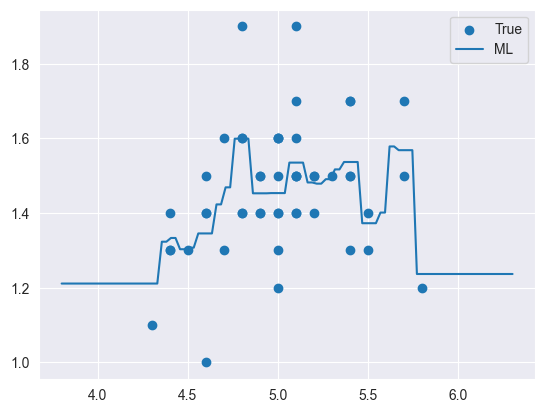

In [72]:
y_p1 = model1.predict(x1)

plt.scatter(data_setosa['sepal_length'], data_setosa['petal_length'], label='True')
#x1, y_p1 = np.meshgrid(x1, y_p1)
plt.plot(x1, y_p1, label='ML')
plt.legend()
plt.show()

## Достоинства
- Простота, быстрота, распараллеливание
- Вероятностная классификация
- Модель непараметрическая

## Недостатки
- Сложно интерпритировать
-